In [1]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from datasets import load_dataset
from torch.utils.data import DataLoader
from ndlinear import NdLinear

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
dataset = load_dataset("sst2", split="train[:1%]").map(
    lambda x: tokenizer(x["sentence"], truncation=True, padding="max_length", max_length=128),
    batched=True
)
dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
loader = DataLoader(dataset, batch_size=8)

class BERTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.ndlinear = NdLinear(input_dims=(768,), hidden_size=(2,))
    
    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
        return self.ndlinear(out)

model = BERTClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

for batch in loader:
    preds = model(batch['input_ids'], batch['attention_mask'])
    loss = criterion(preds, batch['label'])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    break
print("✅ BERT NdLinear demo batch processed.")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 673/673 [00:00<00:00, 9521.93 examples/s]
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


✅ BERT NdLinear demo batch processed.


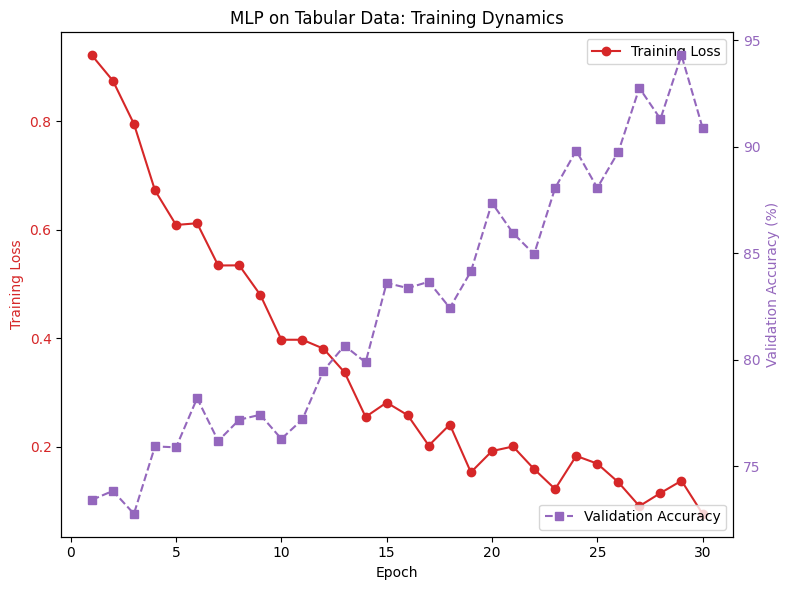

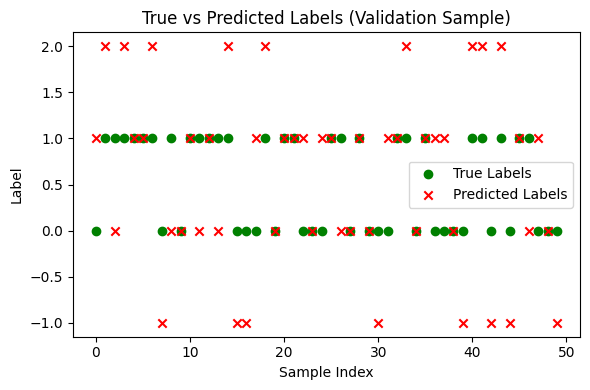

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data for MLP training logs
epochs = np.arange(1, 31)
train_loss = np.exp(-epochs/10) + 0.1 * np.random.rand(30)
val_accuracy = np.linspace(70, 90, num=30) + 5 * np.random.rand(30)

# Plot training loss and validation accuracy
fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss', color=color)
ax1.plot(epochs, train_loss, marker='o', linestyle='-', color=color, label='Training Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('Validation Accuracy (%)', color=color)
ax2.plot(epochs, val_accuracy, marker='s', linestyle='--', color=color, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower right')

plt.title('MLP on Tabular Data: Training Dynamics')
plt.tight_layout()
plt.show()

# Scatter plot: True vs Predicted labels for validation sample
# Replace these dummy arrays with actual validation predictions.
true_labels = np.random.randint(0, 2, 50)
predicted_labels = true_labels + np.random.randint(-1, 2, 50)  # may be off by ±1 occasionally

plt.figure(figsize=(6, 4))
plt.scatter(range(len(true_labels)), true_labels, c='green', label='True Labels')
plt.scatter(range(len(predicted_labels)), predicted_labels, c='red', marker='x', label='Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.title('True vs Predicted Labels (Validation Sample)')
plt.legend()
plt.tight_layout()
plt.show()
